<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  SVD en reconocimiento facial

En este caso-taller vamos a aplicar SVD para hacer reconomciento facial. Esta aplicación se conoce como caras propias, o eigenfaces en inglés, y si bien es una forma rudimentaria de reconocimiento facial sus resultados pueden ser muy interesantes. El problema de las caras propias fue estudiado por primera vez por Sirovich y Kirby en 1987, ampliado en 1990 y su aplicación al reconocimiento facial automatizado fue presentado por Turk and Pentland en 1991.

En este taller vamos a utilizar la base de datos conocida como Caras Etiquetadas en la Naturaleza, o Labeled Faces in the Wild (LFW). Esta base es provista por la Universidad de Massachusetts Amherst para que la comunidad académica la utilice para la evaluación de modelos predictivos.

La base contiene más de 13.000 imágenes de rostros recopilados de la web y cada cara ha sido etiquetada con el nombre de la persona representada. Un subconjunto de 1.680 de las personas fotografiadas tienen dos o más fotos distintas en el conjunto de datos. 


 
#### Referencias

- G. B. Huang,  M. Ramesh, T. Berg, and E. Learned-Miller. Labeled Faces in the Wild: A Database for Studying Face Recognition in Unconstrained Environments. University of Massachusetts, Amherst, Technical Report 07-49, October, 2007.

- M. Kirby and L. Sirovich. Application of the Karhunen-Loève procedure for the characterization of human faces. IEEE Transactions on Pattern Analysis and Machine Intelligence (PAMI), 12(1):103–108, 1990.

- L. Sirovich and M. Kirby. A low-dimensional procedure for the characterization of human faces. Journal of the Optical Society of America A, 4(3):519–524, 1987

- M. Turk and A. Pentland. Eigenfaces for recognition. Journal of Cognitive Neuroscience, 3(1):71–86, 1991.

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos  en la misma ruta de acceso del cuaderno, por ejemplo: `data`.

## Desarrollo


### 1. Carga de datos 

Los datos pueden ser descargados directamente utilizando la librería `scikit-learn`, para ello carge la base utilizando la función `fetch_lfw_people`. Esta función verificará si los datos están disponibles. De no estarlo, `scikit-learn` los descargará automáticamente desde el sitio web de la Universidad de Massachusetts. Descargue las imágenes para individuos que tengan al menos 25 imágenes y guardelos en una carpeta llamada `datos` usando esta función. En el siguiente [link](https://scikit-learn.org/stable/datasets/real_world.html#labeled-faces-in-the-wild-dataset) podrá ver más detalles sobre la base de datos y la función de descarga.

In [1]:

from sklearn.datasets import fetch_lfw_people
repositorio = fetch_lfw_people(data_home='datos2',min_faces_per_person=25, resize=0.5, color=False)


## Análisis
 ***fetch_lfw_people*** pertenece a la libreria de datasets que SkLearn empaquetó para propósito de experimentacion.  *fetch_lfw_people* carga rostros de personajes etiquetados. Los parametros son:
 - data_home: folder cache para almacenar localmente el repositorio en cambio de estar descargandolo de internet todas las veces.
 - resize: factor de cambio en las dimensiones de las imagenes. Este parametro afecta la dimensión de las imagenes returnadas
 - color: permite indicar si se mantiene o no los tres canales RGB. Para este caso solamente se deja el canal de grises.
 
 Use como folder datos2 porque al comienzo del taller, use datos pero cometi un error y no baje el repositorio adecuadamente y quedó corrupto.Me vi obligado a usar datos2 , y funcionó adecuadamente.

 
 
 


### 2.  Análisis preliminar 

Describa los contenidos de la base, tenga en cuenta que debe detallar los elementos, la dimensión de la base, y la dimensión de las imágenes. 

In [2]:
# introspect the images arrays to find the shapes (for plotting)
n_muestras, h, w = repositorio.images.shape
y = repositorio.target
X = repositorio.data
n_features = X.shape[1]
print("Total dataset :")
print("n_muestras: %d" % n_muestras)
print("n_features: %d" % n_features)
print(f'Total Personajes {repositorio.target_names.shape}')
print(f"Dimension Imagenes {h}x{w}")
y.shape




Total dataset :
n_muestras: 2588
n_features: 2914
Total Personajes (42,)
Dimension Imagenes 62x47


(2588,)

## Análisis

- images: numpy array de 2588 imagenes de rostros con  dimensión 62x47 cada imagen.
- y= repositorio.target : labels asociados a cada rostro. La dimension es (2588,)
- X= repositorio.data : matriz de dimensión (2588, 2914).  Cada fila representa una imagen de un rostro en un vector  unidimensional de longitud 2914= 62x47. Esto facilita la entrada a los modelos de entrenamiento  y a la descomnposición SVD. 
- Numero de personajes = 42

A continuación responda las siguientes preguntas: 

- ¿Quiénes son los individuos que tienen al menos 25 imágenes?

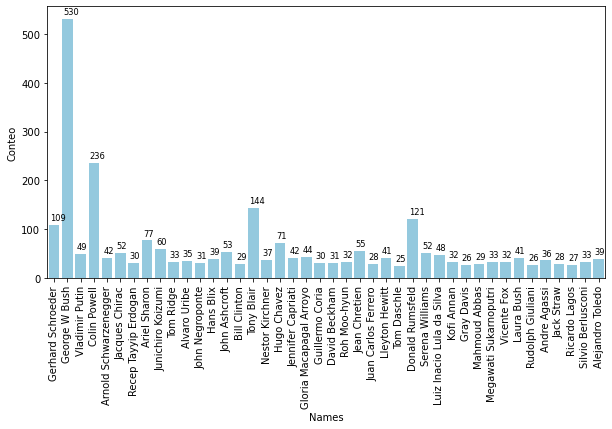

(2588,)
[10  9 41 ...  9 11  9]
['Alejandro Toledo' 'Alvaro Uribe' 'Andre Agassi' 'Ariel Sharon'
 'Arnold Schwarzenegger' 'Bill Clinton' 'Colin Powell' 'David Beckham'
 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Gloria Macapagal Arroyo' 'Gray Davis' 'Guillermo Coria' 'Hans Blix'
 'Hugo Chavez' 'Jack Straw' 'Jacques Chirac' 'Jean Chretien'
 'Jennifer Capriati' 'John Ashcroft' 'John Negroponte'
 'Juan Carlos Ferrero' 'Junichiro Koizumi' 'Kofi Annan' 'Laura Bush'
 'Lleyton Hewitt' 'Luiz Inacio Lula da Silva' 'Mahmoud Abbas'
 'Megawati Sukarnoputri' 'Nestor Kirchner' 'Recep Tayyip Erdogan'
 'Ricardo Lagos' 'Roh Moo-hyun' 'Rudolph Giuliani' 'Serena Williams'
 'Silvio Berlusconi' 'Tom Daschle' 'Tom Ridge' 'Tony Blair' 'Vicente Fox'
 'Vladimir Putin']


In [3]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
    
#Preparando dataframe para ser sando seaborn.countplot
target= { 'ID':repositorio.target,
          'Name':  [''] * repositorio.target.size}
df=pd.DataFrame(target).set_index('ID')
for index, _ in df.iterrows():
    df.at[index,'Name']=repositorio.target_names[index]

# Diagrama de frecuencia de occurencia
fig = plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Name', data=df,color="skyblue")
plt.xlabel("Names")
plt.xticks(rotation=90)
plt.ylabel("Conteo")
for p in ax.patches:
        ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10), size='small')
plt.show()
print(repositorio.target.shape)
print(repositorio.target)
print(repositorio.target_names)


## Análisis

- En orden para obtener un diagrama de frecuencias por personaje  en el cual los nombres de los personajes se muestren, se crea un dataframe cuyo indice es el label que viene en repositorio.target y nombres vacios , para luego cruzar esos indices con repositorio.target_names para actualizar los nombres del dataframe previamente creado.Este dataframe se pasa a countplot de la libreria seaborn.

- Hay diversidad de personajes, desde personajes latinoamericanos, americanos  y europes y asociados a difrentes actividades deportivas, politicas , etc.

- Se observa un  **desbalance** en el dataset teniendo un personaje con muchas imagenes como George Bush y Colin Powell. Este desbalance se tendra encuentra en el momento del entrenamiento en la metrica y en el mecanismo de balanceo.

- ¿Cuál es la distribución de imágenes por individuos? 

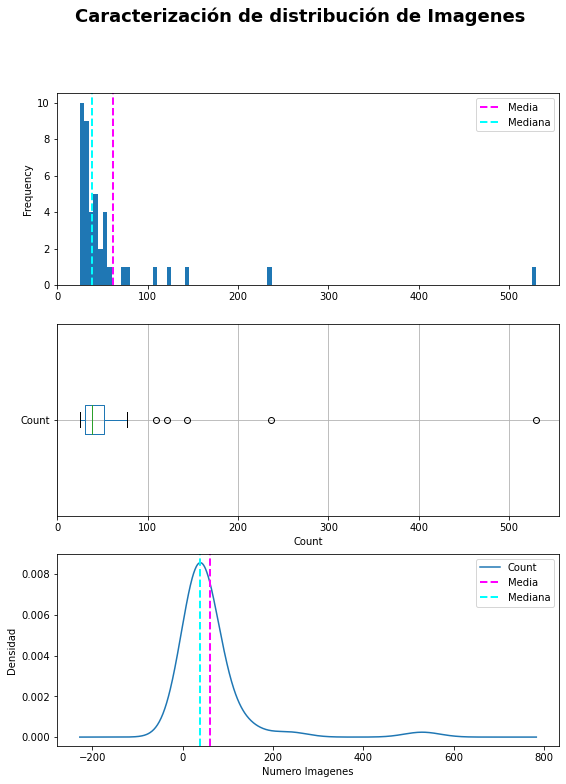

,count,mean,std,min,25%,50%,75%,max
Count,42.0,61.619048,83.618749,25.0,31.0,38.0,52.0,530.0


In [4]:
#Group by
group= df.reset_index().groupby('Name').count().rename(columns={'ID':'Count'})

#Histograma , Boxplot y funcion den densidad  
conteo = group.Count
fig, ax = plt.subplots(3,1, figsize = (9,12))
ax[0].hist(conteo, bins=100)
ax[0].set_ylabel('Frequency')
ax[0].axvline(conteo.mean(), color='magenta', linestyle='dashed', linewidth=2,label='Media')
ax[0].axvline(conteo.median(), color='cyan', linestyle='dashed', linewidth=2,label='Mediana')
ax[0].legend(loc="upper right")
group.boxplot(column=['Count'],ax=ax[1],vert=False)
ax[1].set_xlabel('Count')
fig.suptitle("Caracterización de distribución de Imagenes",fontsize=18,fontweight = "bold")
conteo.plot.density(ax=ax[2])
ax[2].axvline(conteo.mean(), color='magenta', linestyle='dashed', linewidth=2,label='Media')
ax[2].axvline(conteo.median(), color='cyan', linestyle='dashed', linewidth=2,label='Mediana')
ax[2].legend(loc="upper right")
ax[2].set_ylabel('Densidad')
ax[2].set_xlabel('Numero Imagenes')
plt.show()

group.describe().T



## Análisis
- La distribución esta caracterizada por ser ***skewed a la derecha*** influencia por los outliers debido al desbalance del dataset. Su media es 61.6 imagenes y desviacion standar 83.6y co una mediana de 38 imagenes

- En el box plot se observa 5 outliersque corresponden a:  George Bush con 530, Colin Powel 236,Tony Blair 144 , Donald Rumsfeld 121 y Gerard Schoreder con 109. 

-Como se esperaba, el minimo son 25 imagenes y max 530.

- ¿Quién es el individuo con más imágenes en la base? 

In [5]:
group["Count"].idxmax()

'George W Bush'

## Análisis

George Bush es uno de sus outliers con un numero de imagenes de 530 que es tambien el personaje con maximo de imagenes en este dataset. 

- Grafique las imágenes de los individuos latinoamericanos presentes en la base. 

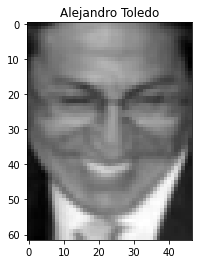

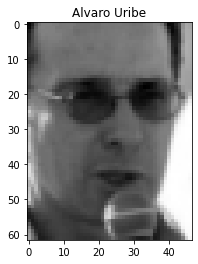

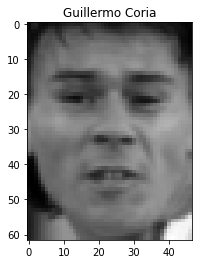

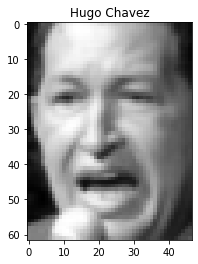

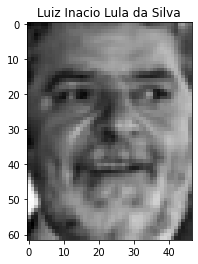

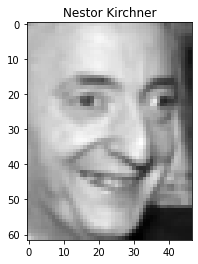

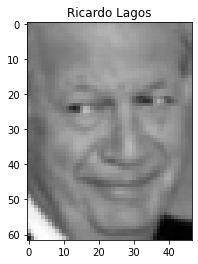

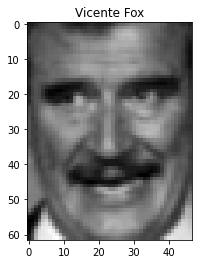

In [6]:
import pylab as pl
import numpy as np

def plot_rostros(galeria_imagenes, galeria_nombres, indices_mostrar):
    n_col=3
    n_filas= int(len(indices_mostrar)/n_col)

    for index in indices_mostrar:
        position=np.where(repositorio.target==index)[0][0]
        pl.imshow(galeria_imagenes[position].reshape((h, w)), cmap=pl.cm.gray)
        pl.title(galeria_nombres[index], size=12)
        pl.show()

idx_latinoamericanos=[0,1,13,15,27,30,32,40]
plot_rostros(X,repositorio.target_names,idx_latinoamericanos)
      

## Análisis
- Se identifican los labels de los ciudadanos latinoamericanos(idx_latinoamericanos) que sirven de referencia para renderizar  una de las imagenes ! 
- Para esto se creo una funcion llamada plot_rostros que se encarga de recorrer idx_latinoamericanos para mostrar cada rostro. Esta función sera usada durante todo el taller para visualizar los rostros.

### 3.  Reconociendo rostros

Como pudo notar en el punto anterior las imágenes son altamente dimensionales y esto puede generar problemas para el reconocimiento facial. Sin embargo, se pueden lograr mejoras significativas en el reconocimiento reduciendo el espacio de los datos a uno de menor dimensión. La pregunta entonces que buscaremos responder es: ¿cómo encontrar este espacio de menor dimensión? La respuesta a esta pregunta son las eigenfaces.

La idea principal detrás de eigenfaces es la siguiente. Supongamos que $\theta$ es un $N^2\times1$ vector que corresponde a la imagen de la cara I de dimensión $N\times N$. Entonces la idea es representar $\Phi= \theta- rostro\, promedio$ en un espacio de dimensión menor. 


#### 3.1. Rostro promedio. 

 Encuentre el rostro promedio, para ello calcule la media por columnas o la media por píxel y grafíquelo.

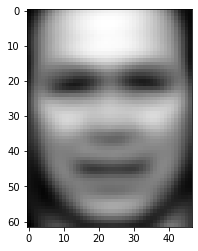

In [7]:
rostro_promedio=X.mean(axis=0).reshape(1,n_features)
pl.imshow(rostro_promedio.reshape((h, w)), cmap=pl.cm.gray)

## Análisis

- Como precondicion , El rostro promedio deberia tener una dimension de (1, 2914) que corresponderia a una sola imagen de 62x47.

- Dado que X= repositorio.data, es una  matriz de dimension (2588, 2914) en la cual cada fila representa una imagen de un rostro contenido  en un vector  unidimensional de longitud 2914, entonces se puede obtener la media de cada columna en X y de esta manera obtener el rostro promedio en un vector unidimensional listo para ser usado en una operacion de vectores.  </br>

***Que significa el rostro promedio?*** 

- Representa las caracteristicas mas predominantes de la biometria de todos los  rostros de este dataset.



#### 3.2. Reste el rostro promedio.

A cada una de las imágenes substraigale el rostro promedio.

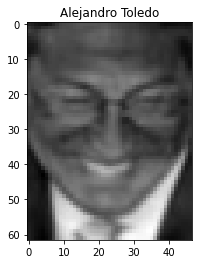

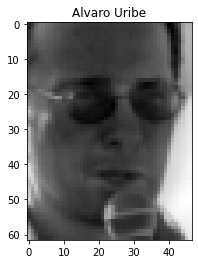

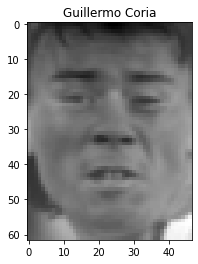

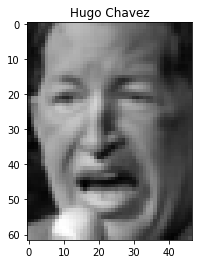

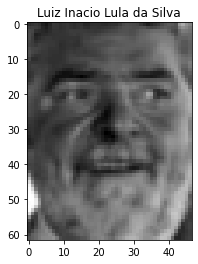

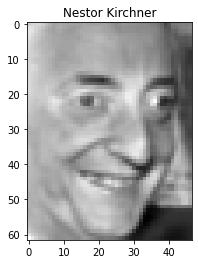

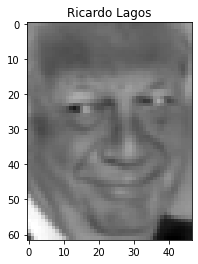

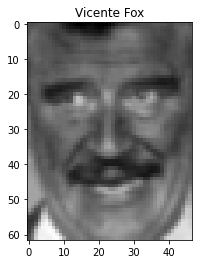

In [8]:
menos_rostro_promedio =X-rostro_promedio
plot_rostros(menos_rostro_promedio,repositorio.target_names,idx_latinoamericanos)

## Análisis

Para hacer la operacion solamente fue solamente necesario hacer la resta a traves de los vectores.

El significado de restar el rostro promedio tiene dos sentidos:

- Suprimir los caracteristicas predominantes para dejar solamente los valores diferenciadores de las caracteristicas de cada personaje.

- Matematicamente hablando, es para centrar los features.

#### 3.3. Descomposición en Valores Singulares 

Aplique la Descomposición en Valores Singulares a estas nuevas imágenes y retenga solo $K$ eigen vectores que mejor representen las imágenes. Justifique su elección.

In [9]:
from scipy.linalg import svd

U,S,VT = svd(menos_rostro_promedio)

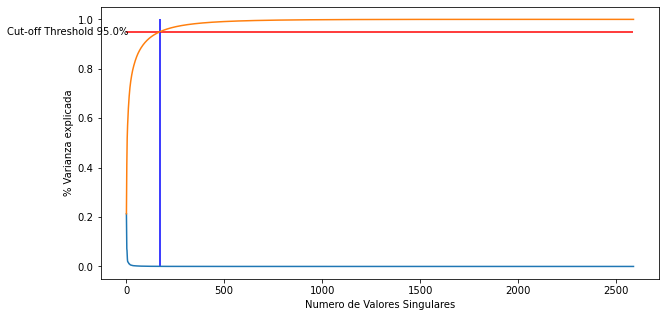

172


In [10]:
from pylab import *

threshold=0.95
var_explained = np.round(S**2/np.sum(S**2), decimals=6)

#Plot Grafica de varianza explicada acumulada 
fig = plt.figure(figsize=(10, 5))
pc_valores = np.arange(len(S)) + 1
plt.plot(pc_valores,var_explained)
plt.xlabel('Numero de Valores Singulares')
plt.ylabel('% Varianza explicada')
plt.plot(pc_valores,np.cumsum(var_explained))
plt.hlines(y = threshold, xmin = 0, xmax = len(S), color='r')
plt.text(12, threshold, 'Cut-off Threshold ' + str(threshold*100) + '%', ha ='right', va ='center')
numero_componentes=np.count_nonzero(np.cumsum(var_explained) <=threshold)
plt.vlines(x = numero_componentes,ymin=0, ymax=1 ,color='b')
plt.show()
print(numero_componentes)



## Análisis
- Se descompone la matrix X-rostro promedio, usando la clase svd de numpy.linalg y obtiene U, S, VT donde U: son los eigenvectores a la izq, VT: eigenvectores a la derecha y S , los valores singulares
- La varianza explicada por cada eigenvector corresponde al cuadrado de  la diagonal de la matriz S.
- Con un threshold de 0.95 de varianza acumulada explicada se obtiene 172 eigenvectores 


#### 3.4. Representando los rostros en las bases

Cada rostro (menos el rostro promedio) puede ser representado como la combinación lineal de los K  eigen vectores  retenidos en el punto anterior. Para los rostros de Arnold Schwarzenegger y Serena Williams muestre que esto es posible.

(2588, 2914)
172


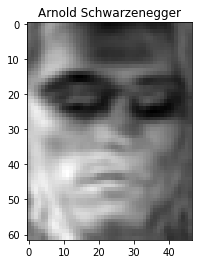

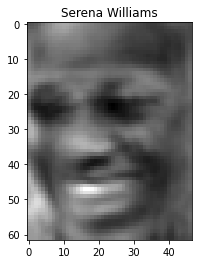

(2588, 172)


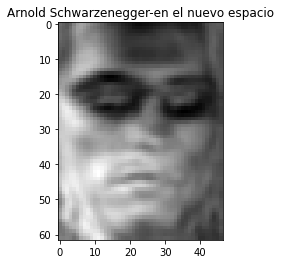

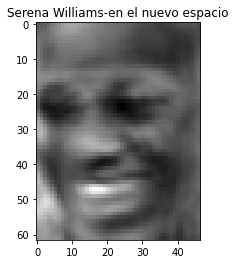

In [13]:
#Por Curiosidad:Reconstuir rostros usando la descomposicion de vaklores singulares X=U*S*VT
l=numero_componentes
S2= resize(S,[n_muestras,1])*eye(n_muestras,n_features)
X_reconstruida=dot(U[:,0:l],dot(S2[0:l,0:l],VT[0:l,:]))
print(X_reconstruida.shape)
print(l)

# Por Curiosidad: Visualizar rostros resconstruidos
idx_samples=[4,35]
plot_rostros(X_reconstruida,repositorio.target_names,idx_samples)

#Transformar rostros en el nuevo espacio vectorial  de los eigenfaces  X*(VT)T -Representacion en las bases
X_transformado=menos_rostro_promedio @ VT[: l, :].T
print(X_transformado.shape)

#Reconstruccion de Arnolnold Schwarzenneger usando el nuevo espacio vectorial
position = np.where(repositorio.target==4)[0][0]
reconstruccion = X_transformado[position] @ VT[: l, :]
pl.imshow(reconstruccion.reshape((h, w)), cmap=pl.cm.gray)
pl.title(repositorio.target_names[repositorio.target[position]] + "-en el nuevo espacio", size=12)
plt.show()

#Reconstruccion de Serena  Williamns usando el nuevo espacio vectorial
position = np.where(repositorio.target==35)[0][0]
reconstruccion = X_transformado[position] @ VT[: l, :]
pl.imshow(reconstruccion.reshape((h, w)), cmap=pl.cm.gray)
pl.title(repositorio.target_names[repositorio.target[position]] + "-en el nuevo espacio", size=12)
plt.show()




## Análisis

- Por curiosidad, se reconstruye la bases originales usando X= U*S*VT y se muestran los rostros reconstruidos de Arnold Swaschenegger y Serena Williams a traves de la misma funcion plot_rostros desarollada para este proposito.

- Se genera una nueva base que es XTransformado= X* (VT)T con reduccion de dimension.
- Se reconstruye los rostros de Arnold y Serena a partir de las nuevas bases usando: X= XTransformado* VT y se visualizan ambos rostros. 

### 4. Uniendo Aprendizaje No Supervisado y Supervisado

Dado que cada rostro puede ser representado como la combinación lineal de los eigen vectores, esto sugiere que pueden servir de insumo para un algoritmo de clasificación de aprendizaje supervizado. En este sección del taller haremos esto.

#### 4.1. Bases de Entrenamiento y Prueba.

Divida la base utilizada anteriormente en dos: 80% de la base de imágenes asignelas a la base de entrenamiento y el 20% restante a la de prueba. Los predictores en este caso son las imágenes, y las variables de respuesta los nombres de quienes aparecen en estas imágenes.

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
n_clases= repositorio.target_names.shape[0]
print(n_clases)
y=repositorio.target
X_train, X_test, y_train, y_test = train_test_split(X-rostro_promedio, y, test_size=0.20, random_state=42)
print(X_train.shape, X_test.shape)

42
(2070, 2914) (518, 2914)


## Análisis

- Y es repositorio.target para el modelo supervizado (labels)
- X-rostro promedio es el dataset de features
- Se emplea train_test_split de sklearn.model_selection con un  test_size de 20%. La dimension de XTrain=(2070, 2914) y Xtest= (518, 2914)

#### 4.2. Preprocesamiento

Para la base de entrenamiento encuentre el número óptimo de valores singulares, y dado este número reduzca la dimensión de su base de prueba. Justifique siempre sus elecciones y respuestas.

In [ ]:
class SVD:
    ''' Clase que encapsula el calculo de los valores/vectores singulares y las transformaciones en las nuevas bases
        Author: Eduardo Toledo
    '''
    
    def __init__(self, num_componentes=None,threshold_varianza=None):
        ''' Descripcion:constructor 
            Parametros
              threshold_varianza: valor entre 0 y 1 que representa la varianza acumulada explicada que se quiere obtener 
                                  Este parametro sera usado para ejercicio 4.2 y 4.3
                num_componentes: explicitamente se le indica el numero de componentes. Este parametro sera usado para el 
                                ultimo ejercicio                 
        '''
        self.var_explained = None
        self.numero_componentes = num_componentes
        self.threshold= threshold_varianza
    
    def fit(self,X):
        ''' 
            Descripcion: Genera la descomposicion en valores singulares
        '''
        (self.U, self.S, self.VT) = np.linalg.svd(X)
        self.S2= resize(self.S,[X.shape[0],1])*eye(X.shape[0],X.shape[1])
        self.var_explained = np.round(self.S**2/np.sum(self.S**2), decimals=6)
        if self.numero_componentes is None:
            self.numero_componentes=np.count_nonzero(np.cumsum(self.var_explained) <= self.threshold)
       
    def transform(self,X):
        '''
            Genera las nuevas bases (transformaciones)
        '''
        X_transformado = X @ self.VT[:self.numero_componentes,:].T
        return X_transformado
     
        
    
    def var_explained(self):
        '''
            Metodo Get para retornar los atributos de la clase
        '''
        return self.var_explained
    
    def num_componentes(self):
        '''
            Metodo Get para retornar los atributos de la clase
        '''
        return self.numero_componentes
    
    def USV(self):
        '''
            Metodo Get para retornar los atributos de la clase
        '''
        return (self.U, self.S, self.VT)
    
       

threshold=0.95
_svd= SVD(threshold_varianza=threshold)
_svd.fit(X_train)
X_train_transformado= _svd.transform(X_train)
X_test_transformado=_svd.transform(X_test)
print(X_train.shape, X_train_transformado.shape)
print(X_test.shape, X_test_transformado.shape)
numero_componentes = _svd.num_componentes()
print(numero_componentes)
U, S, VT= _svd.USV()

#Plot Grafica de varianza explicada acumulada 
fig = plt.figure(figsize=(10, 5))
pc_valores = np.arange(len(_svd.S)) + 1
plt.plot(pc_valores,_svd.var_explained)
plt.xlabel('Numero de Valores Singulares')
plt.ylabel('% Varianza  explicada')
plt.plot(pc_valores,np.cumsum(_svd.var_explained))
plt.hlines(y = threshold, xmin = 0, xmax = len(_svd.S), color='r')
plt.text(12, threshold, 'Cut-off Threshold ' + str(threshold*100) + '%', ha ='right', va ='center')
plt.vlines(x = numero_componentes,ymin=0, ymax=1 ,color='b')
plt.show()



#Reconstruccion de Tony Blair usando el nuevo espacio vectorial
reconstruccion = X_train_transformado[20] @ VT[: numero_componentes, :]
pl.imshow(reconstruccion.reshape((h, w)), cmap=pl.cm.gray)
pl.title(repositorio.target_names[y_train[20]] + "-en el nuevo espacio", size=12)
plt.show()



_svd.var_explained


## Análisis

- Empleando la clase SVD se genera los eigenvectors con un threshold de 95% de varianza acumulada explicada y reteniedo 166 eigenvectores.
- Con ese threshold,  se retienen  166 eigenvectores, significando que se ha transformado desde un espacio dimensional de 2914 a un espacio dimensional de 166.
- Se reconstruye el rostro de Tony Blair a partir de las nuevas bases.
- X-train_transformado y x_test_transformado son generados a partir de la clase SVD para el siguiente ejercicio.

#### 4.3. Estimación de modelo de aprendizaje supervisado

Con estas bases preprocesadas ajuste un modelo de clasificación usando support-vector-machines y evalué el desempeño en su base de prueba. No olvide mencionar qué medida de desempeño está utilizando para evaluar su estimación.

SVC(C=10, class_weight='balanced', random_state=42)
0.5708569869257444
{'C': 10, 'gamma': 'scale'}
                           precision    recall  f1-score   support

         Alejandro Toledo       0.75      0.43      0.55         7
             Alvaro Uribe       0.57      0.57      0.57         7
             Andre Agassi       1.00      0.33      0.50         6
             Ariel Sharon       0.57      0.35      0.43        23
    Arnold Schwarzenegger       0.50      0.25      0.33        12
             Bill Clinton       0.00      0.00      0.00         5
             Colin Powell       0.56      0.77      0.65        48
            David Beckham       0.50      0.10      0.17        10
          Donald Rumsfeld       0.64      0.64      0.64        36
            George W Bush       0.54      0.91      0.67        98
        Gerhard Schroeder       0.30      0.42      0.35        19
  Gloria Macapagal Arroyo       1.00      1.00      1.00         6
               Gray Davis    

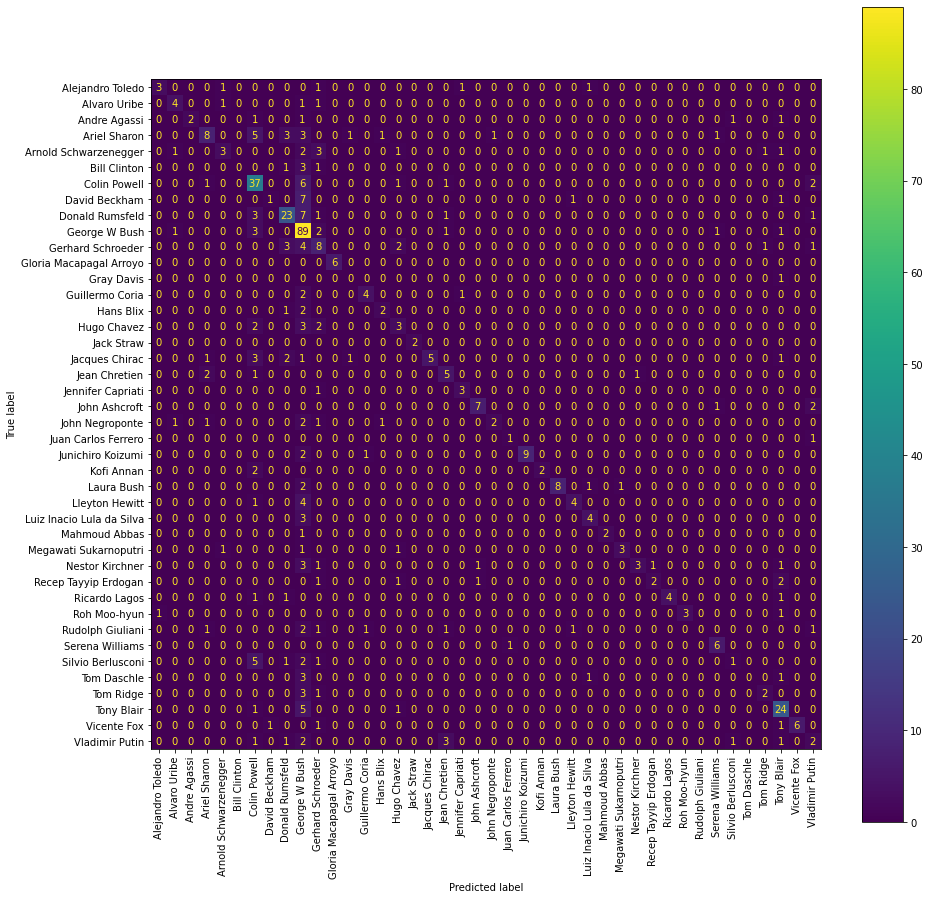

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score 
param_grids = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma':  ['scale' ,'auto',0.001, 0.01, 0.1, 1, 10, 100]
    
}
#Clasificador SVM con kernel radial
gs_svc = GridSearchCV(SVC(kernel='rbf', random_state=42, class_weight='balanced'), param_grids,scoring='f1_weighted')
gs_svc.fit(X_train_transformado, y_train)
print(gs_svc.best_estimator_)
print(gs_svc.best_score_)
print(gs_svc.best_params_)
y_pred = gs_svc.predict(X_test_transformado)
print(classification_report(y_test, y_pred, target_names=repositorio.target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_clases)))
fig, ax = plt.subplots(figsize=(15,15))
cmp= ConfusionMatrixDisplay.from_estimator(
    gs_svc, X_test_transformado, y_test, display_labels=repositorio.target_names,xticks_rotation="vertical", ax=ax
)

print(f1_score(y_test, y_pred,  average='weighted'))


## Análisis

- Se emplea un estimador SVC - Clasificador de Support Vector Machine - con kernel radial apropiado para reconocimiento de patrones. Dado que el dataset es imbalanceado, el parametro class_weight = 'balanced' permite que las clases con menos frecuencia tenga mas peso. Se descarta la metrica de accuracy debido al imbalance del dataset. La escogencia de la  metrica es f1-weighted. F1 porque  logra consistencia entre recall y precision.
- A traves de GridSearchCV se buscan los mejores parametros de C - factor de regularizacion - y Gamma- grado de curvatura.Los mejores parametros es {'C': 10, 'gamma': 'scale'}
- Se obtiene un F1 score en test de 0.559
- Observando la matrix de confusion, el modelo tiende predecir mas a Geroge Bush , Collin Powel,Donald Runsfeld y Tony Blair que son precisamente los oultiers previamente descritos.




#### 4.4. Mejorando el Ajuste

Construya ahora su propio algoritmo para hacer la clasificación. Primero calcule los valores singulares, y después realice un proceso de selección secuencial de valores singulares que permita encontrar el mejor modelo sobre la muestra de entrenamiento. Una vez encontrado el mejor modelo, evalue en la muestra de prueba.  Compare y discuta esta forma de elegir el número de variables con aquella utilizada en 4.2 y 4.3. 

SCORE EN TRAINING 0.28794110941916756 con 10 componentes
SCORE EN TRAINING 0.4520651781559765 con 25 componentes
SCORE EN TRAINING 0.5474564298164352 con 50 componentes
SCORE EN TRAINING 0.5683727671577631 con 100 componentes
SCORE EN TRAINING 0.5698826791876186 con 150 componentes
SCORE EN TRAINING 0.5708569869257444 con 166 componentes
SCORE EN TRAINING 0.5638149957837005 con 200 componentes
SCORE EN TRAINING 0.56064870427683 con 300 componentes
SCORE EN TRAINING 0.557306291156374 con 500 componentes
MAX. SCORE ALCANZADO EN TRAINING FUE CON 0.5708569869257444 COMPONENTES
F1_SCORE en TEST 0.5486699726947547


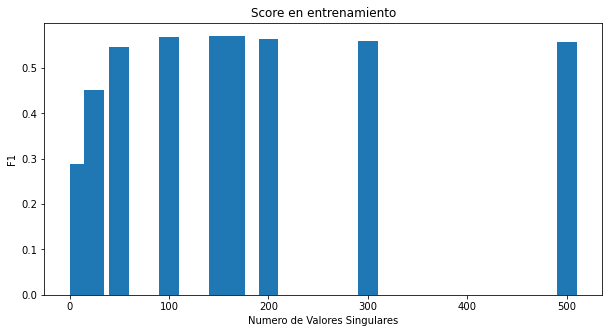

In [24]:
# EXPERIMENTO 1: A traves de seleccion secuencial de los valores singulares usar el mismo clasificador SVM con kernel radial.

from sklearn.metrics import f1_score 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

scores=[]
mejores_params=[]
numero_valores_singulares=[10,  25, 50, 100, 150, 166,200, 300,500]

for valores_singulares in numero_valores_singulares:
    _svd = SVD(num_componentes=valores_singulares)
    _svd.fit(X_train)
    X_train_svd = _svd.transform(X_train)
    X_test_svd = _svd.transform(X_test)
 
    param_grids = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'gamma':  ['scale' ,'auto']
    
    }
    
    gs_svc = GridSearchCV(SVC(kernel='rbf', random_state=42, class_weight='balanced'), param_grids,scoring='f1_weighted')
    # fit the data
    gs_svc.fit(X_train_svd, y_train)
    scores.append(gs_svc.best_score_)
    mejores_params.append(gs_svc.best_params_)
    print(f'SCORE EN TRAINING {gs_svc.best_score_} con {_svd.num_componentes()} componentes')

ind = np.argmax(scores)
print(f'MAX. SCORE ALCANZADO EN TRAINING FUE CON {scores[ind]} COMPONENTES')
clf=SVC(kernel='rbf', 
        C= mejores_params[ind].get('C'),
        gamma= mejores_params[ind].get('gamma'),
        random_state=42, 
        class_weight='balanced'
       )
clf.fit(X_train_svd, y_train)
y_pred = gs_svc.predict(X_test_svd)
f1_score=f1_score(y_test, y_pred,  average='weighted')
print(f'F1_SCORE en TEST {f1_score}')
fig = plt.figure(figsize = (10, 5))
plt.bar(lista_valores_singulares,scores,width = 20)

plt.xlabel("Numero de Valores Singulares")
plt.ylabel("F1")
plt.title("Score en entrenamiento")
plt.show()



SCORE EN TRAINING 0.2167545164397014 con 10 componentes
SCORE EN TRAINING 0.27816458680637834 con 25 componentes
SCORE EN TRAINING 0.31029281926663954 con 50 componentes
SCORE EN TRAINING 0.3232964472725971 con 100 componentes
SCORE EN TRAINING 0.3188684897183288 con 150 componentes
SCORE EN TRAINING 0.31929635550309915 con 166 componentes
SCORE EN TRAINING 0.3195307424666792 con 200 componentes
SCORE EN TRAINING 0.31896561552785424 con 300 componentes
SCORE EN TRAINING 0.3197303478755764 con 500 componentes
3
F1_SCORE en TEST 0.30562514430694415


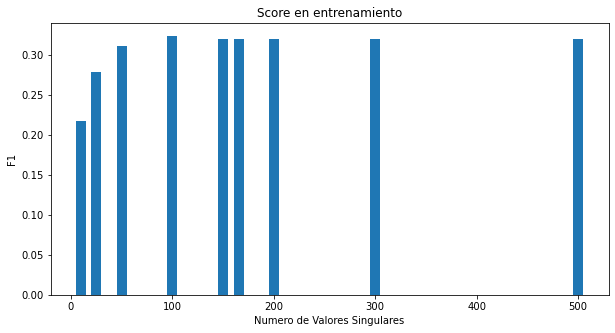

In [25]:
# EXPERIMENTO 2: A traves de la seleccion secuencial de valores singulares, usar otro clasificadr en este caso uno mas sencillo:KNeighborsClassifier

from sklearn.metrics import f1_score 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
scores=[]
mejores_params=[]
lista_valores_singulares=[10,  25, 50, 100, 150, 166,200, 300,500]

for valores_singulares in lista_valores_singulares:
    _svd = SVD(num_componentes=valores_singulares)
    _svd.fit(X_train)
    X_train_svd = _svd.transform(X_train)
    X_test_svd = _svd.transform(X_test)
 
    param_grids = {
        'n_neighbors': range(3,50),
    }
    
    gs_svc = GridSearchCV(KNeighborsClassifier(), param_grids,scoring='f1_weighted')
    # fit the data
    gs_svc.fit(X_train_svd, y_train)
    #print('Mejor Estimador:')
    #print(gs_svc.best_score_)
    #print(gs_svc.best_params_)
    scores.append(gs_svc.best_score_)
    mejores_params.append(gs_svc.best_params_)
    print(f'SCORE EN TRAINING {gs_svc.best_score_} con {_svd.num_componentes()} componentes')

ind = np.argmax(scores)

clf=KNeighborsClassifier(n_neighbors=mejores_params[ind].get('n_neighbors'))
clf.fit(X_train_svd, y_train)
y_pred = gs_svc.predict(X_test_svd)
f1_score=f1_score(y_test, y_pred,  average='weighted')
print(f'F1_SCORE en TEST {f1_score}')
fig = plt.figure(figsize = (10, 5))
plt.bar(lista_valores_singulares,scores,width = 10)

plt.xlabel("Numero de Valores Singulares")
plt.ylabel("F1")
plt.title("Score en entrenamiento")
plt.show()



## Análisis

Se realizan dos experimentos con modelos diferentes y  con seleccion secuencial de valores singulares. Ambos modelos usan la clase SVD y explicitamente se le pasa como parametro el numero de componentes.

### Experimento 1
Se usa el mismo clasificador SVM con kernel radial ajustando los mejores parametros (C y Gamma) con GridSearchCV. Ahora la clase SVD se le pasa explicitamente el numero de valores singulares.
Se obtiene en el componente 166 el mejor F1 SCORE de 0.5708 en training y 0.548 en test . Esto coincide con el numero de componentes del ejercicio 4.2 y 4.3 y basicamente es la misma forma de escoger el numero de variables.

### Experimento 2

Se usa un clasificador sencillo como el KVecinos ajustando el numero de vecinos mediante GridSearchCV.Igualmente la clase SVD se le pasa explicitamente el numero de valores singulares. 
Se obtiene un pobre score del orden de 0.32 y con un numero de componentes = 100. Aqui se refleja un problema de este algoritmo de KNN con alta dimensionalidad porque este necesita que todos los points esten cercanos y a medida que se agregan nuevas dimensiones, esta condicion es dificil de cumplir.</br> Sin embargo, quiero resaltar  el hecho que esta seleccion de numero de variables no coincide es por la esencia del algoritmo y no porque el procedimiento sea diferente al del 4.2 y 4.3

## Algunas nuevas consideraciones

En terminos generales el score es muy bajo y se podria mejorar con varias alternativas:

- Remover los 5 outliers para que el dataset quede  mejor representado (BALANCEADO)
- Usar una tecnica de balanceo como SMOTE para balancear el dataset. Aqui lo interesante, es que se crearian rostros sinteticos para que el dataset quedase balanceado.

- Usar un modelo mas flexible como redes  redes Convolucionales que captura las relaciones espaciales de los pixeles.
